In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 13.4 MB/s 
     |████████████████████████████████| 102 kB 58.1 MB/s 
     |████████████████████████████████| 690 kB 64.4 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 56.6 MB/s 
     |████████████████████████████████| 4.7 MB 51.1 MB/s 
     |████████████████████████████████| 296 kB 61.1 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=4b0ef41114792a4cfdf7708155535fe24e8ceac6c6d35137cd41a95e889a7248
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df=pd.read_csv(r'/content/drive/MyDrive/CIND820BigProject/Data/PatSurvRaw.csv')

print(df.dtypes)

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object


In [4]:
# Eliminate features that do not provide any information value (i.e. 'encounter_id', 'patient_id', 'apache_4a_hospital_death_prob','apache_4a_icu_death_prob') OR are not of interest in our prediction and analysis (the physiological measures, i.e. 'bilirubin_apache','bun_apache','creatinine_apache', etc)
df.drop(['encounter_id','patient_id','readmission_status','albumin_apache','apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','glucose_apache','heart_rate_apache','hematocrit_apache','map_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache','resprate_apache','sodium_apache','temp_apache','urineoutput_apache','wbc_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_invasive_max','d1_mbp_invasive_min','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_invasive_max','d1_sysbp_invasive_min','d1_sysbp_max','d1_sysbp_min','d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_invasive_max','h1_diasbp_invasive_min','h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min','h1_heartrate_max','h1_heartrate_min','h1_mbp_invasive_max','h1_mbp_invasive_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min','h1_sysbp_max','h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','h1_temp_max','h1_temp_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min','d1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min','d1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','d1_hematocrit_min','d1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','d1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min','d1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max','h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min','h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max','d1_arterial_pco2_min','d1_arterial_ph_max','d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max','h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','apache_4a_hospital_death_prob','apache_4a_icu_death_prob'],axis =1, inplace = True)

In [5]:
df.shape

(91713, 31)

In [6]:
#Drop rows that have missing values in more than 2 columns
#df=df.dropna(thresh=len(df.columns)-2)
df=df.dropna(thresh=29)

In [7]:
#drop the following features (reason)
#hospital_admit_source (over 20K missing values)
# i. weight and ii. height (these are both highly correlated with bmi, which is calculated as weigh(kg) / height(meters squared)
# apache_2_bodysystem (superseded by apache_3j_bodysystem)
df.drop(['hospital_admit_source','weight','height','apache_2_bodysystem'],axis =1, inplace = True)

In [8]:
#Impute missing quantitative variables with the mean
df1 = df
df1['age']=df1['age'].fillna(df1['age'].mean())
df1['bmi']=df1['bmi'].fillna(df1['bmi'].mean())
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88485 entries, 0 to 91712
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  88485 non-null  int64  
 1   hospital_death               88485 non-null  int64  
 2   age                          88485 non-null  float64
 3   bmi                          88485 non-null  float64
 4   elective_surgery             88485 non-null  int64  
 5   ethnicity                    87309 non-null  object 
 6   gender                       88474 non-null  object 
 7   icu_admit_source             88401 non-null  object 
 8   icu_id                       88485 non-null  int64  
 9   icu_stay_type                88485 non-null  object 
 10  icu_type                     88485 non-null  object 
 11  pre_icu_los_days             88485 non-null  float64
 12  gcs_eyes_apache              88485 non-null  float64
 13  gcs_motor_apache

In [9]:
#Impute missing categorical variables with the mode
df1=df1.fillna(df1.mode().iloc[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88485 entries, 0 to 91712
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  88485 non-null  int64  
 1   hospital_death               88485 non-null  int64  
 2   age                          88485 non-null  float64
 3   bmi                          88485 non-null  float64
 4   elective_surgery             88485 non-null  int64  
 5   ethnicity                    88485 non-null  object 
 6   gender                       88485 non-null  object 
 7   icu_admit_source             88485 non-null  object 
 8   icu_id                       88485 non-null  int64  
 9   icu_stay_type                88485 non-null  object 
 10  icu_type                     88485 non-null  object 
 11  pre_icu_los_days             88485 non-null  float64
 12  gcs_eyes_apache              88485 non-null  float64
 13  gcs_motor_apache

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [11]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df1[['age','bmi','pre_icu_los_days','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache', 'hospital_death']].corr()

age       bmi  pre_icu_los_days  gcs_eyes_apache  \
age                1.000000 -0.084300          0.049921         0.025994   
bmi               -0.084300  1.000000         -0.001188         0.012601   
pre_icu_los_days   0.049921 -0.001188          1.000000        -0.025307   
gcs_eyes_apache    0.025994  0.012601         -0.025307         1.000000   
gcs_motor_apache   0.025574  0.020686         -0.014523         0.799502   
gcs_verbal_apache -0.017583  0.028170         -0.046534         0.778729   
hospital_death     0.106638 -0.031799          0.065124        -0.258340   

                   gcs_motor_apache  gcs_verbal_apache  hospital_death  
age                        0.025574          -0.017583        0.106638  
bmi                        0.020686           0.028170       -0.031799  
pre_icu_los_days          -0.014523          -0.046534        0.065124  
gcs_eyes_apache            0.799502           0.778729       -0.258340  
gcs_motor_apache           1.000000           0.699345       -0.280181  
gcs_verbal_apache          0.699345           1.000000       -0.239638  
hospital_death            -0.280181          -0.239638        1.000000

In [18]:
df1.groupby(by='hospital_death').agg('mean')[['age','bmi','pre_icu_los_days','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache']]

age        bmi  pre_icu_los_days  gcs_eyes_apache  \
hospital_death                                                            
0               61.809992  29.253740          0.791064         3.538945   
1               68.122204  28.319032          1.367902         2.653149   

                gcs_motor_apache  gcs_verbal_apache  
hospital_death                                       
0                       5.580654           4.106493  
1                       4.281187           2.758829

In [20]:
pd.crosstab(df1.gender,df1.hospital_death, margins=True)

hospital_death      0     1    All
gender                            
F               37202  3516  40718
M               43836  3931  47767
All             81038  7447  88485

In [22]:
pd.crosstab(df1.ethnicity,df1.hospital_death, margins=True)

hospital_death        0     1    All
ethnicity                           
African American   8505   708   9213
Asian              1006    91   1097
Caucasian         63649  5931  69580
Hispanic           3259   319   3578
Native American     707    69    776
Other/Unknown      3912   329   4241
All               81038  7447  88485

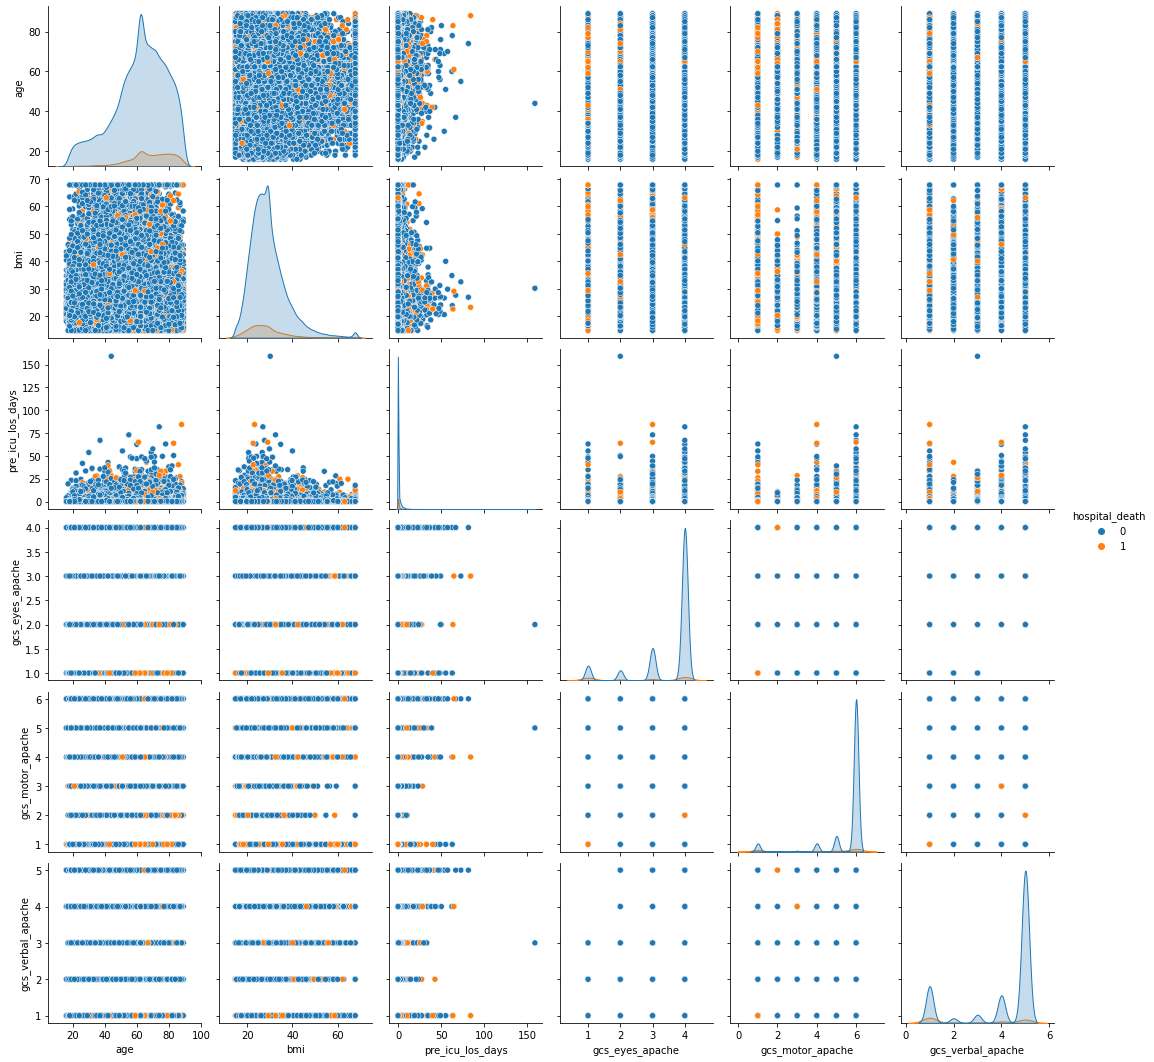

In [28]:
cols_to_plot = ['age','bmi','pre_icu_los_days','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache', 'hospital_death']
#cols_to_plot = ['age','bmi','pre_icu_los_days','hospital_death']
sns.pairplot(df[cols_to_plot], hue='hospital_death')